In [105]:
import string
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import nltk
nltk.download("punkt")
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.cm as cm
color_map = cm.get_cmap('rainbow')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naihin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [106]:
df = pd.read_excel("path/to/excel/with/titles.xlsx")
titles = df["title"]

In [107]:
# Pre-process the data by tokenizing and removing stop words
stop_words = set(["and", "the", "of", "in", "to", "a", "with", "for", "is", "on", "by","n"])
titles = [title.lower().split() for title in titles]
titles = [word for title in titles for word in title if word not in stop_words]

In [108]:
# Count the frequency of each word
word_count = {}
for word in titles:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1


In [117]:
num_words = 20
limited_words = sorted(word_count, key=word_count.get, reverse=True)[:num_words]

In [118]:
# Create the word network
G = nx.Graph()
for word in limited_words:
    G.add_node(word)

In [119]:
# Add edges between the nodes
for i in range(len(limited_words) - 1):
    for j in range(i + 1, len(limited_words)):
        G.add_edge(limited_words[i], limited_words[j])


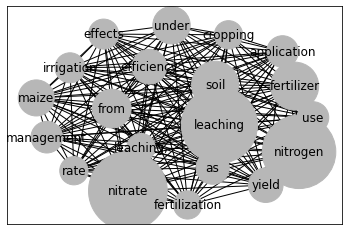

In [132]:
## Plot the word network with node size based on frequency
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[word_count[word] * 100 for word in limited_words],node_shape="o", node_color="#B7B7B7")
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
#plt.show()
plt.savefig("word_network.tiff", format="tiff", dpi=400)